### Average Age Plots

In [2]:
import numpy as np
import datetime

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

### Remapping the modes from the analysis
from scipy import interpolate
from matplotlib.mlab import griddata
import matplotlib.path as mpath

import cmocean

from netCDF4 import date2num, num2date


In [3]:
#define the basic map projection information and figure size

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

#download land mask
# 50m is a good balance between dataset size and land feature resolution
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor='0.0')

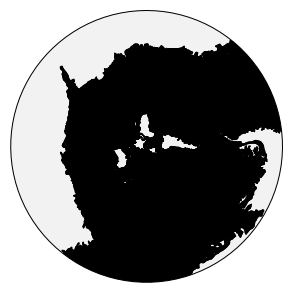

In [4]:
projection=ccrs.NorthPolarStereo(central_longitude=200.0,true_scale_latitude=0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)

#cm=ax.pcolormesh(xi,yi,zi/file_count,transform=transformation,cmap=cmocean.cm.oxy, vmin=0)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')

#plt.colorbar(cm)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k', alpha=.05))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='k', alpha=1))

In [5]:
import xarray as xa

In [7]:
xdf = xa.open_mfdataset('/Users/bell/in_and_outbox/data_sets/ice_age/nsidc0611_seaice_age_v4/*.nc',combine='by_coords')

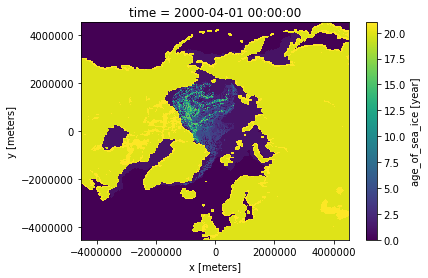

In [6]:
xdf.sel(time=slice('2000-04-01', '2000-04-07')).age_of_sea_ice[0,:,:].plot.pcolormesh()

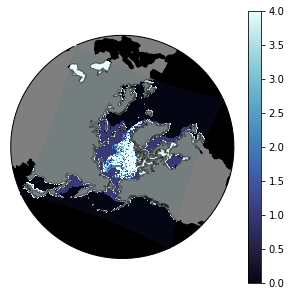

In [7]:
ice_age = xdf.sel(time=slice('2000-04-01', '2000-04-07')).age_of_sea_ice[0,:,:].values
lat = xdf.sel(time=slice('2000-04-01', '2000-04-07')).latitude[0,:,:].values
lon = xdf.sel(time=slice('2000-04-01', '2000-04-07')).longitude[0,:,:].values

projection=ccrs.NorthPolarStereo(central_longitude=200.0,true_scale_latitude=0)
transformation=ccrs.PlateCarree()
fig,ax = make_map(projection=projection)
cm=ax.pcolormesh(lon,lat,ice_age,transform=transformation,cmap=cmocean.cm.ice, vmin=0, vmax=4, zorder=3)

#ax.add_feature(land_50m, zorder=3)
#ax.coastlines(resolution='50m')

plt.colorbar(cm)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k', alpha=.5, zorder=3))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='k', alpha=1))

In [8]:
ice_age[ice_age==21]

array([21, 21, 21, ..., 21, 21, 21], dtype=uint8)

In [9]:
from matplotlib import colors as c
clist = ['#f1eef6','#bdc9e1','#74a9cf','#2b8cbe','#045a8d','#045a8d']
from matplotlib.colors import from_levels_and_colors
cmap, norm = from_levels_and_colors([0,1, 2, 3, 4,5], 
                                    clist,extend='max') # mention levels and colors here

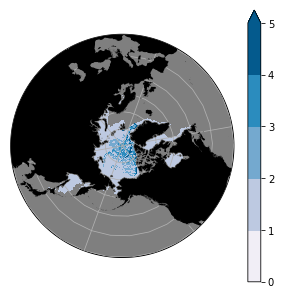

In [14]:
for year in range(2018,2019,1):
    yearstr=str(year)
    ice_age = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).age_of_sea_ice[0,:,:].values
    ice_age=ice_age.astype(float)
    ice_age[ice_age==21] = np.nan
    ice_age[ice_age==20] = np.nan
    ice_age[ice_age==0] = np.nan
    lat = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).latitude[0,:,:].values
    lon = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).longitude[0,:,:].values

    projection=ccrs.NorthPolarStereo(central_longitude=200.0,true_scale_latitude=0)
    transformation=ccrs.PlateCarree()
    fig,ax = make_map(projection=projection)
    cm=ax.pcolormesh(lon,lat,ice_age,transform=transformation,cmap=cmap,norm=norm, zorder=3)


    plt.colorbar(cm)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 10000)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.gridlines(zorder=3)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor=None, facecolor='k', alpha=.5))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='grey', facecolor='grey',zorder=3))
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor=None, facecolor='k', alpha=1,zorder=3))

    fig.savefig(yearstr+'_ice_age.png',dpi=600)
    #fig.savefig(yearstr+'_ice_age.svg',dpi=600)    

1984 3774.375
1985 3907.65625
1986 4222.34375
1987 4131.40625
1988 4105.3125
1989 3484.6875
1990 3036.71875
1991 3272.34375
1992 3017.1875
1993 3027.03125
1994 3169.6875
1995 2886.875
1996 2896.09375
1997 2725.46875
1998 3231.40625
1999 3205.0
2000 3080.9375
2001 2708.4375
2002 2858.75
2003 3163.28125
2004 2820.0
2005 2772.1875
2006 2529.6875
2007 2195.46875
2008 1497.8125
2009 1207.65625
2010 1253.90625
2011 1399.6875
2012 1270.46875
2013 1067.03125
2014 1258.125
2015 1467.34375
2016 1317.8125
2017 928.4375
2018 1045.78125
2019 1311.09375


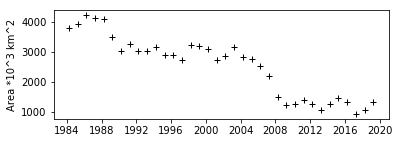

In [19]:
#area extent
fig, ax = plt.subplots(figsize=(6, 2))
for year in range(1984,2020,1):
    yearstr=str(year)
    ice_age = xdf.sel(time=slice(yearstr+'-04-01', yearstr+'-04-07')).age_of_sea_ice[0,:,:].values
    
    
    print(yearstr, (np.count_nonzero(((ice_age!=21) & (ice_age!=20)) & (ice_age>2) )*12.5*12.5) / 1000)  #km x km
    ax.plot(datetime.datetime(year,4,1), (np.count_nonzero(((ice_age!=21) & (ice_age!=20)) & (ice_age>2) )*12.5*12.5) / 1000,'k+')
    ax.set_ylabel('Area *10^3 km^2')